In [1]:
import pandas as pd
df=pd.read_csv("dataset/education_zwe.csv")
df=pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    12528 non-null  object
 1   Country ISO3    12528 non-null  object
 2   Year            12528 non-null  object
 3   Indicator Name  12528 non-null  object
 4   Indicator Code  12528 non-null  object
 5   Value           12528 non-null  object
dtypes: object(6)
memory usage: 587.4+ KB


In [13]:
#Select the target data based on a key word in the target's indicator name

df['Indicator Name'].astype('string')
filter_rate=df['Indicator Name'].str.contains('school enrollment, preprimary', case=False, na=False)
df_T=df[filter_rate]
df_T.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
9932,Zimbabwe,ZWE,2020,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,72.5255966186523
9933,Zimbabwe,ZWE,2019,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,71.7121887207031
9934,Zimbabwe,ZWE,2018,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,69.6893692016602
9935,Zimbabwe,ZWE,2017,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,70.5182037353516
9936,Zimbabwe,ZWE,2016,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,67.2838592529297


In [15]:
#Apply the defined period of time to study, to the dataset

df_T['Year']=df_T.loc[2:,'Year'].astype('int')
df_T=df_T[df_T['Year']> 1990]
df_T['Year'].dtypes

dtype('int64')

In [4]:
#pivot the table so the indicators are columns and categories for study, ordered by year

df_t=df_T.pivot(index=['Year'],columns=['Indicator Name'], values='Value')
df_t=df_t.astype(float)

#check for NaN values
print(df_t.isna().sum())
df_t.head()

Indicator Name
School enrollment, preprimary (% gross)            0
School enrollment, preprimary, female (% gross)    1
School enrollment, preprimary, male (% gross)      1
dtype: int64


Indicator Name,"School enrollment, preprimary (% gross)","School enrollment, preprimary, female (% gross)","School enrollment, preprimary, male (% gross)"
Year,,,
1995,34.960140,37.770569,32.193230
1998,60.485550,NaN,NaN
2000,66.854439,67.981720,65.742142
2002,61.446468,62.966091,59.946812
2003,67.827080,61.461418,74.113869


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#scale and normalise data using standard scaler
df_normalised = StandardScaler().fit_transform(df_t)
df_n=pd.DataFrame(df_normalised)
df_n.columns=df_t.columns
df_n.index=df_t.index

<AxesSubplot:xlabel='Year'>

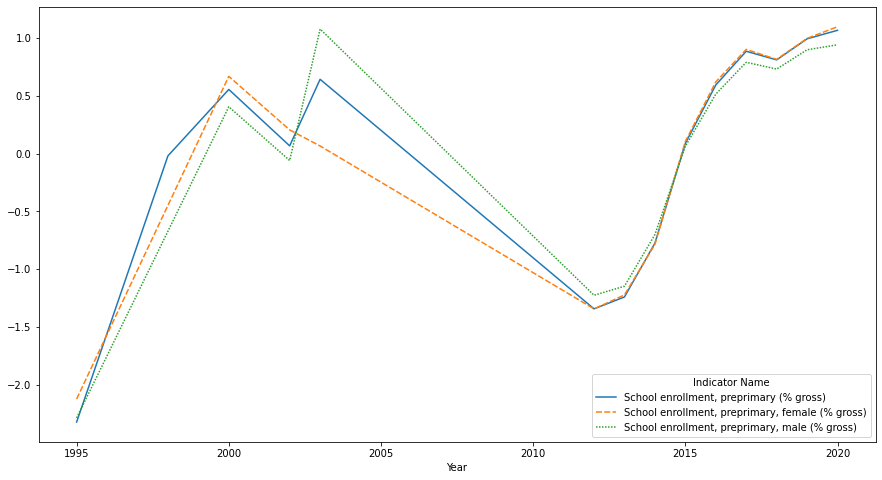

In [6]:
#plot normalised datset
plt.figure(figsize = (15,8))
sns.lineplot(data=df_n)

In [7]:
#fill the null values

from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
X2=impute_knn.fit_transform(df_n)
df_k=pd.DataFrame(X2)
df_k.columns=df_t.columns
df_k.index=df_t.index
df_k.head()

Indicator Name,"School enrollment, preprimary (% gross)","School enrollment, preprimary, female (% gross)","School enrollment, preprimary, male (% gross)"
Year,,,
1995,-2.323536,-2.124251,-2.288354
1998,-0.019786,0.154747,0.001778
2000,0.555027,0.668432,0.405383
2002,0.066940,0.204793,-0.059940
2003,0.642811,0.065703,1.077573


<AxesSubplot:xlabel='Year'>

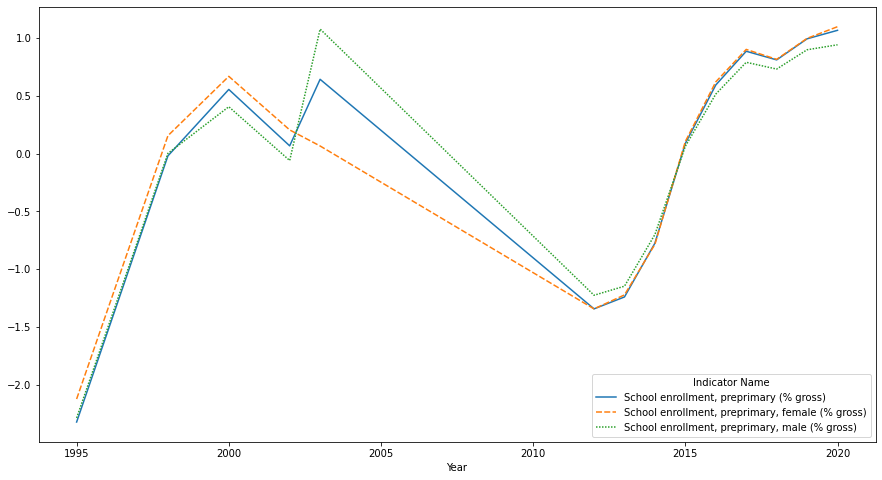

In [8]:
#plot datset without NaN values
plt.figure(figsize = (15,8))
sns.lineplot(data=df_k)

<AxesSubplot:xlabel='Indicator Name'>

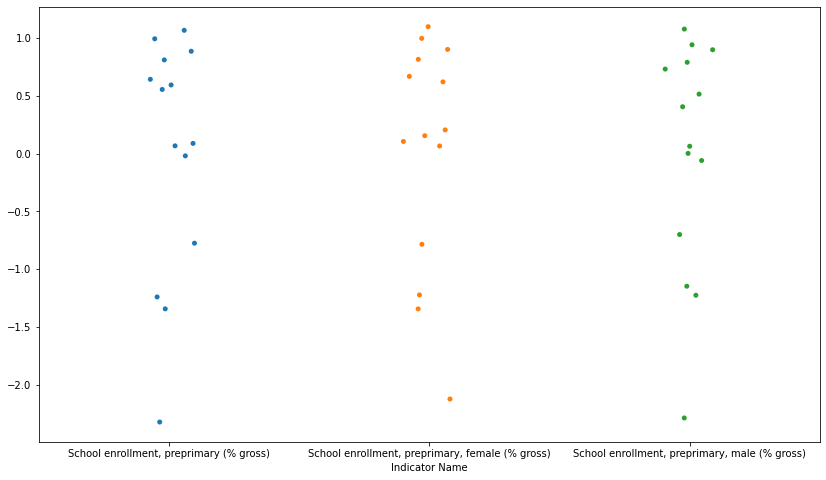

In [9]:
plt.figure(figsize = (14,8))
sns.stripplot(data=df_k)

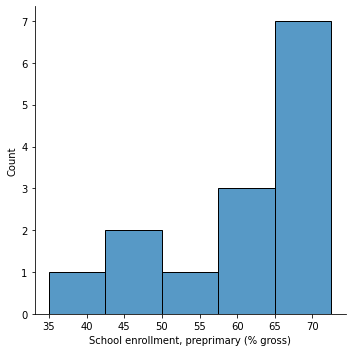

In [10]:
sns.displot(data=df_t.iloc[:,0])

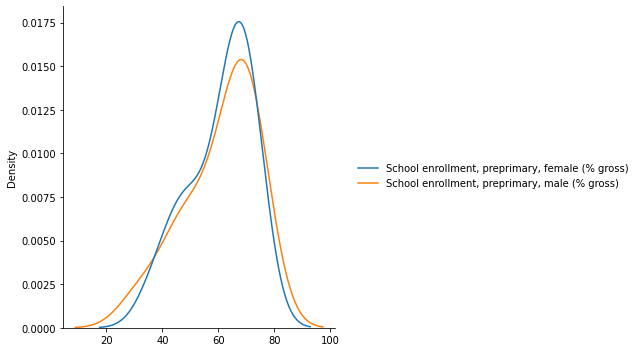

In [11]:
sns.displot(data=[df_t.iloc[:,1],df_t.iloc[:,2]], kind="kde")

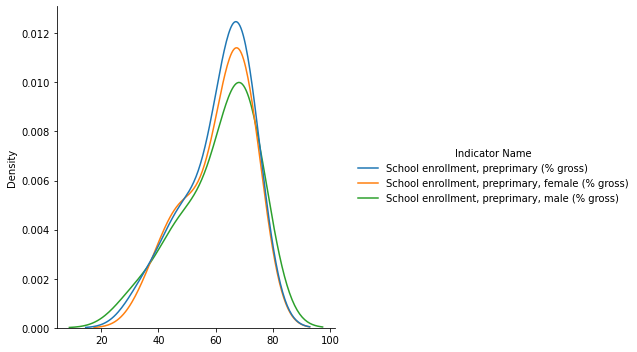

In [12]:
sns.displot(data=df_t, kind="kde")